# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Изменяем-типы-данных" data-toc-modified-id="Изменяем-типы-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изменяем типы данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Корреляция-цены-с-тем-на-каком-этаже-расположена-квартира:-первом,-последнем-или-другом" data-toc-modified-id="Корреляция-цены-с-тем-на-каком-этаже-расположена-квартира:-первом,-последнем-или-другом-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Корреляция цены с тем на каком этаже расположена квартира: первом, последнем или другом</a></span></li><li><span><a href="#Корреляция-цены-с-датой-размещения:-дня-недели,-месяца-и-года." data-toc-modified-id="Корреляция-цены-с-датой-размещения:-дня-недели,-месяца-и-года.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Корреляция цены с датой размещения: дня недели, месяца и года.</a></span></li><li><span><a href="#Цена-квадратного-метра-для-топ-10-населенных-пунктов-с-наибольшим-количеством-объявлений" data-toc-modified-id="Цена-квадратного-метра-для-топ-10-населенных-пунктов-с-наибольшим-количеством-объявлений-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Цена квадратного метра для топ-10 населенных пунктов с наибольшим количеством объявлений</a></span></li><li><span><a href="#Находим-центр-Питера!" data-toc-modified-id="Находим-центр-Питера!-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Находим центр Питера!</a></span></li><li><span><a href="#Различия-между-квартирами-в-центре-и-на-периферии" data-toc-modified-id="Различия-между-квартирами-в-центре-и-на-периферии-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Различия между квартирами в центре и на периферии</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных

In [1]:
import pandas as pd
import warnings
df = pd.read_csv('/Users/alex/Desktop/питон/real_estate_data.csv', sep='\t')
print(df.info())
print(df.describe(include='all'))
print(df.head(10))
warnings.filterwarnings("ignore") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Пропуски присутствуют в следующих стобцах: ['ceiling_height', 'living_area', 'is_apartment', 'kitchen_area',
                                    'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 
                                    'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' и 'days_exposition'.

## Предобработка данных

In [2]:
display(df.isna().sum())
# выводим количество пропусков

df['balcony'] = df['balcony'].fillna(0)
# заполняем пропуски в столбце "balcony"

kitchen_total_coefficient = (df['kitchen_area']/df['total_area']).mean()
# высчитываем среднюю долю кваратуры кухни в общей квадратуре квартиры

df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']*kitchen_total_coefficient)
# заполняем пропуски в 'kitchen_area'

df['living_area'] = df['total_area'] - df['kitchen_area']
# заполняем пропуски в 'living_area'

df['kitchen_area'] = round(df['kitchen_area'], 2)
df['living_area'] = round(df['living_area'], 2)
# округляем до двух значений после запятой вышевычисленные площади

print(df['is_apartment'].unique())
# проверяем уникальные значения в 'is_apartment'

df['is_apartment'] = df['is_apartment'].fillna('False')
# заполняем пропуски в 'is_apartment'

df = df.dropna(subset=['locality_name'])
# удаляем пропуски в столбце 'locality_name'

df = df[df['rooms'] != 0]
# удаляем пропуски в столбце 'rooms'

df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())
# заполняем пропуски в столбце 'days_exposition'

df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
# заполняем пропуски в столбце 'ceiling_height' медианой

ceiling_height = df[(df['ceiling_height'] < 6) & (df['ceiling_height'] > 2.3)]
# убираем аномальные значения в столбце 'ceiling_height'

df = ceiling_height
# объединяем исходный датасет и фильтрованый по столбцу 'ceiling_height'

print(df['floors_total'].unique())
# проверяем уникальные значения в 'floors_total'

df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())
# заполняем пропуски в 'floors_total'

floors_total = df[(df['floors_total'] < 25) & (df['floors_total'] > 0)]
# убираем аномальные значения в столбце 'floors_total'

df = floors_total
# объединяем исходный датасет и фильтрованый по столбцу 'floors_total'

display(df.isna().sum())
# проверяем количество пропусков

df.reset_index(drop=True)
# сбрасываем индексы

print(df.duplicated().value_counts())
# поверяем датасет на наличие дубликатов

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

[nan False True]
[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.]


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5206
cityCenters_nearest      5185
parks_around3000         5184
parks_nearest           14240
ponds_around3000         5184
ponds_nearest           13448
days_exposition             0
dtype: int64

False    22022
dtype: int64


## Изменяем типы данных 

In [3]:
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22022 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22022 non-null  int64         
 1   last_price            22022 non-null  float64       
 2   total_area            22022 non-null  float64       
 3   first_day_exposition  22022 non-null  datetime64[ns]
 4   rooms                 22022 non-null  int64         
 5   ceiling_height        22022 non-null  float64       
 6   floors_total          22022 non-null  int64         
 7   living_area           22022 non-null  float64       
 8   floor                 22022 non-null  int64         
 9   is_apartment          22022 non-null  object        
 10  studio                22022 non-null  bool          
 11  open_plan             22022 non-null  bool          
 12  kitchen_area          22022 non-null  float64       
 13  balcony         

Количество этажей и количество балконов не могут быть десятичными, приведем их целочисленному, а так же 'first_day_exposition' переведем их строки в формат datetime

## Расчёты и добавление результатов в таблицу

In [4]:
df['square_meter_cost'] = round(df['last_price']/df['total_area'], 2)
# расчет и добавление в таблицу стоимости квадратного метра 
df['square_meter_cost'] 

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: square_meter_cost, Length: 22022, dtype: float64

In [5]:
df['weekday'] = df['first_day_exposition'].dt.weekday
# расчет и добавление в таблицу дня недели публикации объявления 
df['month'] = df['first_day_exposition'].dt.month
# расчет и добавление в таблицу месяца публикации объявления 
df['year'] = df['first_day_exposition'].dt.year
# расчет и добавление в таблицу года публикации объявления 
print(df[['weekday','month','year']])

       weekday  month  year
0            3      3  2019
1            1     12  2018
2            3      8  2015
3            4      7  2015
4            1      6  2018
...        ...    ...   ...
23694        1      3  2017
23695        0      1  2018
23696        6      2  2018
23697        1      3  2017
23698        4      7  2017

[22022 rows x 3 columns]


Создаем слобцы день недели, месяц и год.

In [6]:
def floors_category_func(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

df['floor_category'] = df.apply(floors_category_func, axis=1)
print(df['floor_category'])

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_category, Length: 22022, dtype: object


Формула для определения категории этажа, и далее пробегаемся ей по всем значениям столбца 'floor' при помощи apply и сохраняем всё это в новом столбце 'floor_category'

In [7]:
df['living_area_total_area'] = df['living_area'] / df['total_area']

Высчитываем и добавляем в новый столбец 'living_area_total_area' долю жилой площади от общей площади

In [8]:
df['kitchen_area_total_area'] = df['kitchen_area'] / df['total_area']

Высчитываем и добавляем в новый столбец 'kitchen_area_total_area' долю площади кухни от общей площади

       living_area_total_area  kitchen_area_total_area
0                    0.768519                 0.231481
1                    0.727723                 0.272277
2                    0.851786                 0.148214
3                    0.812642                 0.187358
4                    0.590000                 0.410000
...                       ...                      ...
23694                0.896644                 0.103356
23695                0.855932                 0.144068
23696                0.812698                 0.187302
23697                0.696417                 0.303583
23698                0.721362                 0.278638

[22022 rows x 2 columns]
[[<AxesSubplot:title={'center':'living_area_total_area'}>
  <AxesSubplot:title={'center':'kitchen_area_total_area'}>]]


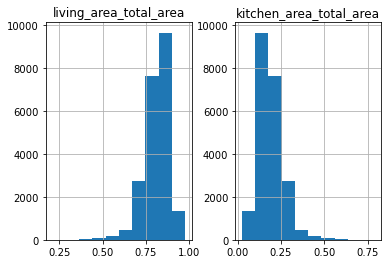

In [9]:
print(df[['living_area_total_area','kitchen_area_total_area']])
print(df[['living_area_total_area','kitchen_area_total_area']].hist())


Выводим жилую площадь и площадь кухни и строим по ним гистограммы 

## Исследовательский анализ данных

2     7497
1     7301
3     5551
4     1161
5      318
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
Name: rooms, dtype: int64
AxesSubplot(0.260833,0.125;0.503333x0.755)


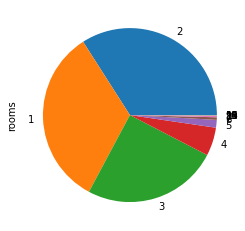

In [10]:
# Отобразим графически и таблицой распределение квартир по количеству комнат
print(df['rooms'].value_counts())
print(df['rooms'].value_counts().plot(kind='pie'))


из диаграммы видно, что больше всего объявлений о продаже двушек, практически треть от всех объявлений, на втором месте с мизерным отставанием в чуть менее двух ста объявлений однушки, далее идут трёшки с около 1/4, ну и четырёшки с 1/22

AxesSubplot(0.125,0.125;0.775x0.755)
2.65    8950
2.50    3485
2.60    1577
2.70    1404
3.00    1090
2.55     966
2.80     850
2.75     766
3.20     276
3.10     200
Name: ceiling_height, dtype: int64


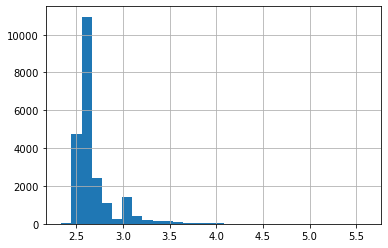

In [11]:
# Отобразим графически и таблицой распределение квартир по высоте потолков
print(df['ceiling_height'].hist(bins=30))
print(df['ceiling_height'].value_counts().head(10))


Самая распространенная высота потолков - 2.65, затем 2.50, 2,60, 2,70

AxesSubplot(0.260833,0.125;0.503333x0.755)


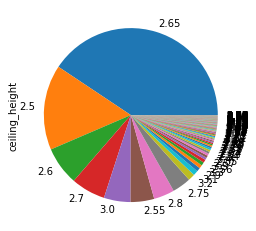

In [12]:
print(df['ceiling_height'].value_counts().plot(kind='pie'))

Тоже самое на примере круглой диаграммы

AxesSubplot(0.125,0.125;0.775x0.755)


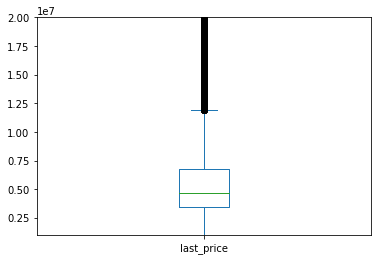

In [13]:
# Посмотрим на распределение стоимостей квартир
print(df['last_price'].plot(kind='box', ylim=(1000000,20000000)))

Медианная цена квартиры 5 млн, где-то около 6 млн 3 квантиль, и около 2,5 млн 1 квантиль. График вывел в промежутке от 1 млн до 20 млн так как считаю, что это больше похоже на реальную картину.

AxesSubplot(0.125,0.125;0.775x0.755)


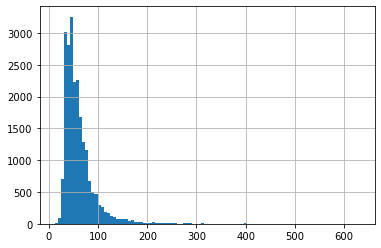

In [14]:
# Посмотрим на распределение квартир в зависимости от общей площади
print(df['total_area'].hist(bins=100))

Больше всего квартир площадью около 30-60 квадратов

# Обработка редких значений

In [15]:
# Функция определяющая 1 и 3 квартили, межквартильный размах, и фильтрующая датасет от выбросов
def filter_quantile(data, column, plot=False):
    # computing Q1, Q3, IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
    low_threshold = Q1 - (1.5 * IQR)
    high_threshold = Q3 + (1.5 * IQR)
    filtered_data = data[(data[column] >= int(low_threshold)) &
                         (data[column] <= int(high_threshold))]
 
    # Boxplot
    if plot: 
        filtered_data[column].plot(kind='box')
        print(f"Процент данных с выбросами в {column}: {1 - filtered_data.shape[0] / data.shape[0]:.2%}")
        print(f"Нижний порог: {low_threshold:.2f}")
        print(f"Верхний порог: {high_threshold:.2f}")
    else:
        return filtered_data

Процент данных с выбросами в total_area: 5.57%
Нижний порог: -3.49
Верхний порог: 114.10
None


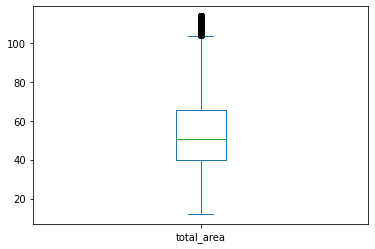

In [16]:
#Выведем процент выбросов, границы усов боксплота и отрисуем сам боксплот для столбца с общей площадью квартир
#После отфильтруем датасет от строк с выбросами в столбце total_area
print(filter_quantile(df,'total_area', plot=True))
df = df[df['total_area'] <= 130]

Процент данных с выбросами в rooms: 0.01%
Нижний порог: -2.00
Верхний порог: 6.00
None


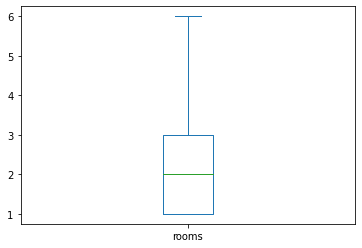

In [17]:
#Выведем процент выбросов, границы усов боксплота и отрисуем сам боксплот для столбца с количеством комнат
#После отфильтруем датасет от строк с выбросами в столбце rooms
print(filter_quantile(df,'rooms', plot=True))
df = df[df['rooms'] <= 6]



Процент данных с выбросами в living_area: 2.21%
Нижний порог: -9.00
Верхний порог: 95.00
None


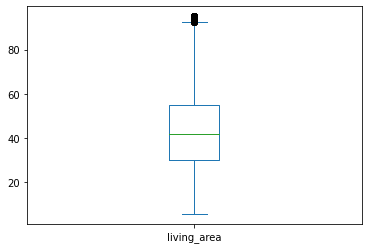

In [18]:
#Выведем процент выбросов, границы усов боксплота и отрисуем сам боксплот для столбца с жилой площадью
print(filter_quantile(df,'living_area', plot=True))

Процент данных с выбросами в last_price: 6.61%
Нижний порог: -1212500.00
Верхний порог: 11047500.00
None


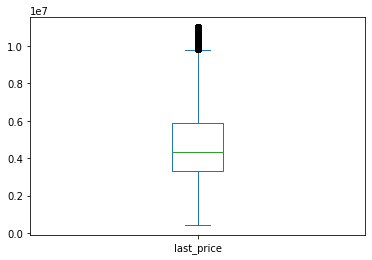

In [19]:
#Выведем процент выбросов, границы усов боксплота и отрисуем сам боксплот для столбца с ценой
print(filter_quantile(df,'last_price', plot=True))

Редкие значения данного столбца я отбросил на этапе предобработки.

Процент данных с выбросами в kitchen_area: 5.72%
Нижний порог: 0.53
Верхний порог: 17.78
None


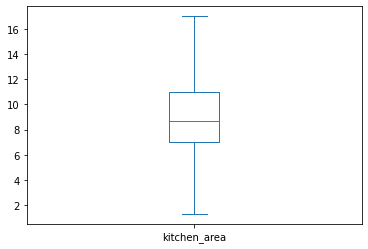

In [20]:
#Выведем процент выбросов, границы усов боксплота и отрисуем сам боксплот для столбца с площадью кухни
#После отфильтруем датасет от строк с выбросами в столбце kitchen_area
print(filter_quantile(df,'kitchen_area', plot=True))
df = df[df['kitchen_area'] < 20]


Процент данных с выбросами в floors_total: 0.00%
Нижний порог: -7.00
Верхний порог: 25.00
None


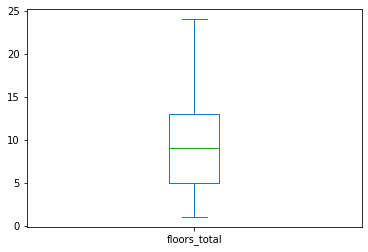

In [21]:
#Выведем процент выбросов, границы усов боксплота и отрисуем сам боксплот для столбца с площадью кухни
#После отфильтруем датасет от строк с выбросами в столбце kitchen_area
print(filter_quantile(df,'floors_total', plot=True))

Процент данных с выбросами в days_exposition: 9.92%
Нижний порог: -178.50
Верхний порог: 417.50
None


158.20938147380883

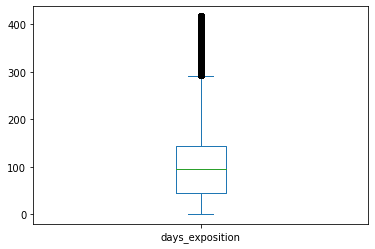

In [22]:
#Выведем процент выбросов, границы усов боксплота и отрисуем сам боксплот для столбца с сроком размещения объявления
#После отфильтруем датасет от строк с выбросами в столбце days_exposition
print(filter_quantile(df,'days_exposition', plot=True))
df = df.loc[df.loc[:,'days_exposition'] < 1080]
df['days_exposition'].mean()

# Ответ на вопрос:
Медианное время продажи квартиры 100 дней, среднее 158 дней.
Если квартира продалась менее чем за полтора месяц - это быстро, а если квартира продается более полутора года, то это очень долгая продажа.

Процент данных с выбросами в floor: 5.07%
Нижний порог: -5.50
Верхний порог: 14.50
None


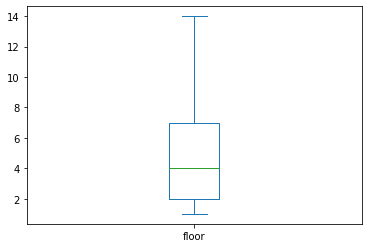

In [23]:
#Выведем процент выбросов, границы усов боксплота и отрисуем сам боксплот для столбца с количеством этажей
#После отфильтруем датасет от строк с выбросами в столбце floor
print(filter_quantile(df,'floor', plot=True))

# Проверка корелляции цены c площадью, числом комнат, удалённостью от центра

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.683853,0.404729,-0.330147
total_area,0.683853,1.000000,0.797489,-0.183634
rooms,0.404729,0.797489,1.000000,-0.113055
cityCenters_nearest,-0.330147,-0.183634,-0.113055,1.000000


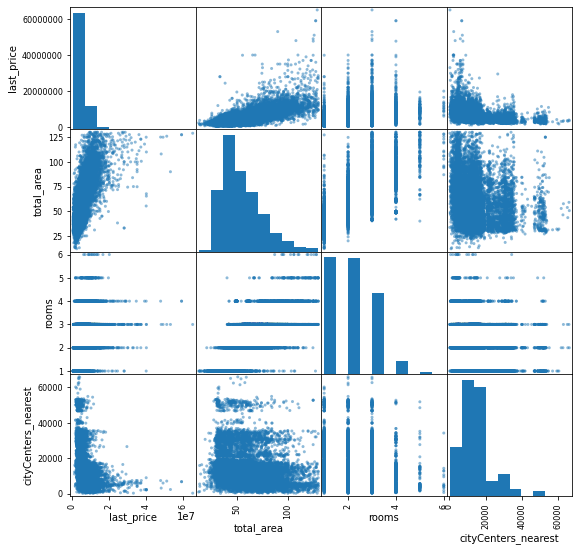

In [24]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(df[['last_price', 'total_area','rooms', 'cityCenters_nearest']], figsize = (9,9))
df[['last_price','total_area', 'rooms', 'cityCenters_nearest']].corr()

Наибольший вклад в цену квартиры вносит квадратура, затем идет количество комнат, а уделённость от центра показала наименьшее влияние на цену при том ещё и обратно пропорциональное.

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.709544,NaN,-0.392822
total_area,0.709544,1.000000,NaN,-0.110196
rooms,NaN,NaN,NaN,NaN
cityCenters_nearest,-0.392822,-0.110196,NaN,1.000000


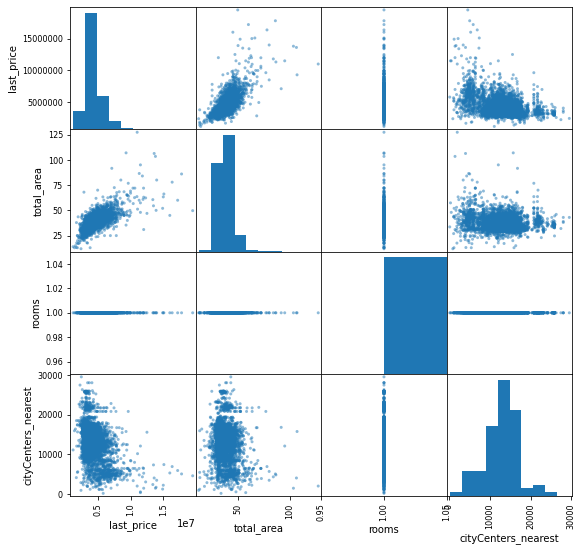

In [25]:
last_price_corr = df[['locality_name','last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
last_price_corr = last_price_corr[(last_price_corr['cityCenters_nearest'].notna()) & (last_price_corr['last_price'] > 1000000) & (last_price_corr['last_price'] < 20000000) & (last_price_corr['locality_name'] == 'Санкт-Петербург' ) & (last_price_corr['rooms'] == 1 )]
pd.plotting.scatter_matrix(last_price_corr, figsize = (9,9))
last_price_corr.corr()


Попробовал проверить на более узкой выборке - однушки в Питере, но результат оказался даже ещё более выраженным.

## Корреляция цены с тем на каком этаже расположена квартира: первом, последнем или другом

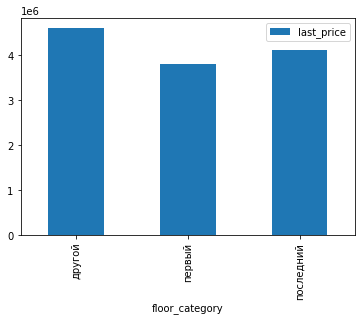

In [26]:
room_category_last_price_corr = df.pivot_table(index= 'floor_category', values='last_price', aggfunc='median').plot(kind='bar')


Квартиры на первом этаже обычно дешевле всего, затем идут квартиры на последнем этаже, а все остальные обычно стоят дороже первых двух.

## Корреляция цены с датой размещения: дня недели, месяца и года.

,last_price,weekday,month,year
last_price,1.000000,-0.013969,0.001237,-0.006733
weekday,-0.013969,1.000000,0.008856,-0.002171
month,0.001237,0.008856,1.000000,-0.274019
year,-0.006733,-0.002171,-0.274019,1.000000


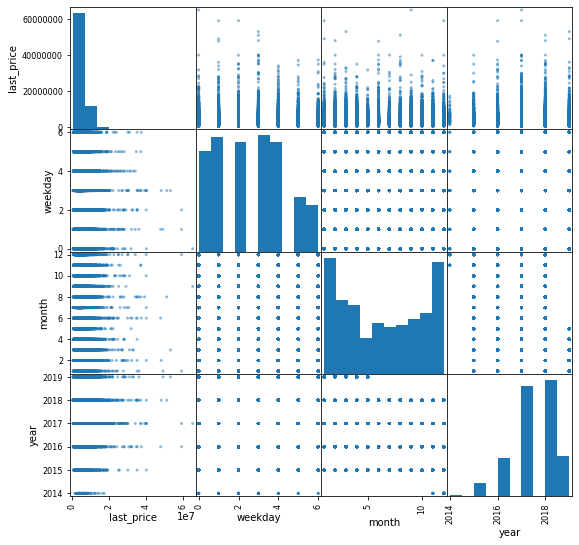

In [27]:
weekday_month_year_last_price_corr = df[['last_price','weekday', 'month', 'year']]
pd.plotting.scatter_matrix(weekday_month_year_last_price_corr , figsize=(9,9))
weekday_month_year_last_price_corr.corr()


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


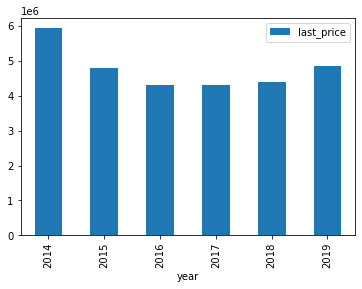

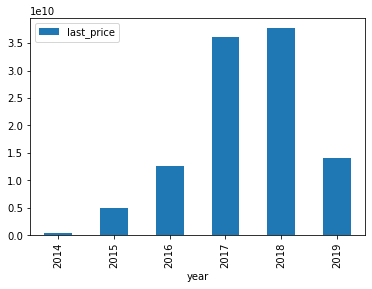

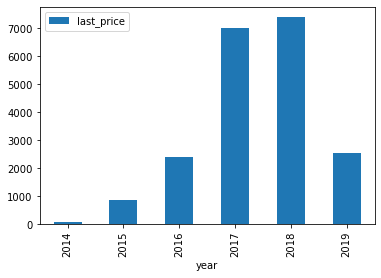

In [28]:
print(df.pivot_table(index='year', values='last_price',aggfunc='median').plot(kind='bar'))
print(df.pivot_table(index='year', values='last_price',aggfunc='sum').plot(kind='bar'))
print(df.pivot_table(index='year', values='last_price',aggfunc='count').plot(kind='bar'))



Медианная цена продаваемых квартир была наибольшей в 2014, затем за два года она упала на треть и ещё два года держалась на этом уровне, и только в 18 и 19 годах начала вновь расти. А вот сумма и объем сделок напротив в 14 были минимальными, все последующие годы до 2018  показали очень существенный рост, но в 19 опять очень сильно упали.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


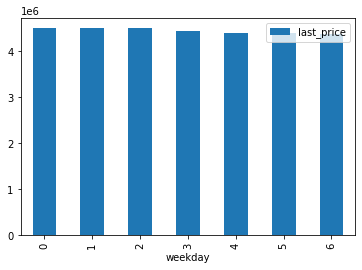

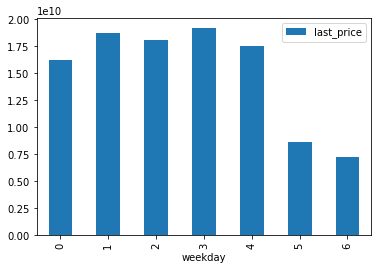

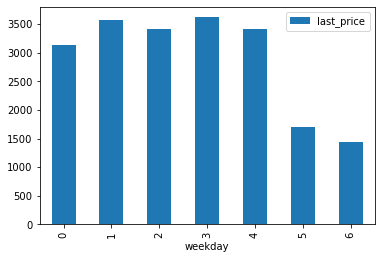

In [29]:
print(df.pivot_table(index='weekday', values='last_price',aggfunc='median').plot(kind='bar'))
print(df.pivot_table(index='weekday', values='last_price',aggfunc='sum').plot(kind='bar'))
print(df.pivot_table(index='weekday', values='last_price',aggfunc='count').plot(kind='bar'))

Медианная цена продаваемых квартир особо не меняется ото дня ко дню внутри недели, а вот количество и объем сделок в будни в два раза выше.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


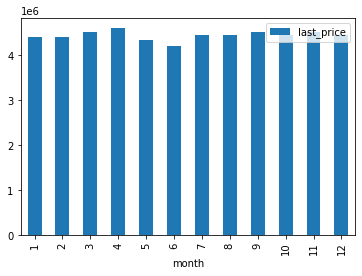

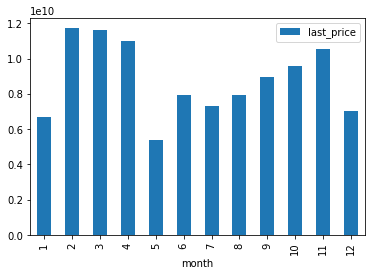

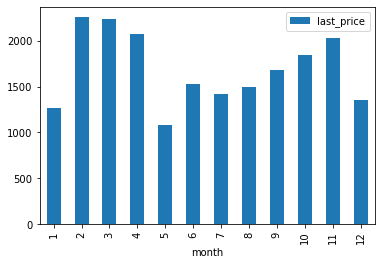

In [30]:
print(df.pivot_table(index='month', values='last_price',aggfunc='median').plot(kind='bar'))
print(df.pivot_table(index='month', values='last_price',aggfunc='sum').plot(kind='bar'))
print(df.pivot_table(index='month', values='last_price',aggfunc='count').plot(kind='bar'))

Медианная цена продаваемых квартир особо не меняется ото дня ко дню внутри года, но вот количество и обьем сделок больше с февраля по апрель включительно и с сентября по ноябрь тоже наблюдается рост.

## Цена квадратного метра для топ-10 населенных пунктов с наибольшим количеством объявлений

In [31]:
top_10_by_quantity = df['locality_name'].value_counts().reset_index().head(10)
display(top_10_by_quantity)

for i in range(len(top_10_by_quantity)):
    print("Цена квадратного метра жилья в городе {} : {} рублей".format(
        top_10_by_quantity['index'][i],
        round(df.loc[df.loc[:,'locality_name'] == (top_10_by_quantity['index'][i])]['square_meter_cost'].mean(),
              2
             )
    )
         )


,index,locality_name
0,Санкт-Петербург,13170
1,посёлок Мурино,392
2,Всеволожск,378
3,посёлок Шушары,365
4,Пушкин,332
5,Колпино,331
6,Гатчина,300
7,Выборг,224
8,деревня Кудрово,218
9,Петергоф,194


Цена квадратного метра жилья в городе Санкт-Петербург : 109047.31 рублей
Цена квадратного метра жилья в городе посёлок Мурино : 84531.51 рублей
Цена квадратного метра жилья в городе Всеволожск : 68533.83 рублей
Цена квадратного метра жилья в городе посёлок Шушары : 78769.12 рублей
Цена квадратного метра жилья в городе Пушкин : 101455.48 рублей
Цена квадратного метра жилья в городе Колпино : 75296.37 рублей
Цена квадратного метра жилья в городе Гатчина : 68815.37 рублей
Цена квадратного метра жилья в городе Выборг : 58018.31 рублей
Цена квадратного метра жилья в городе деревня Кудрово : 92921.86 рублей
Цена квадратного метра жилья в городе Петергоф : 84485.56 рублей


## Находим центр Питера!

<AxesSubplot:>

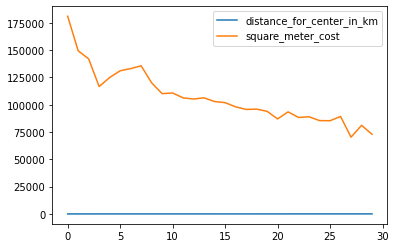

In [32]:
df['distance_for_center_in_km'] = round(df['cityCenters_nearest']/1000,0)
df['cost_one_km'] = df['last_price'] / df['distance_for_center_in_km']
df.query("locality_name == 'Санкт-Петербург'").pivot_table(index='distance_for_center_in_km', values='square_meter_cost').reset_index().sort_values('distance_for_center_in_km').plot()


**Итого** - *центр Санкт-Петербурга равен первым семи километрам.*

## Различия между квартирами в центре и на периферии

Квартиры в центре:

,last_price,rooms,total_area,ceiling_height,distance_for_center_in_km,weekday,month,year
last_price,1.000000,0.303892,0.579804,0.135444,-0.065200,-0.001293,-0.032003,0.010236
rooms,0.303892,1.000000,0.784265,0.175449,-0.170145,-0.008259,0.004975,-0.046626
total_area,0.579804,0.784265,1.000000,0.219282,-0.150245,-0.019887,0.005164,-0.070089
ceiling_height,0.135444,0.175449,0.219282,1.000000,-0.240972,-0.035960,-0.015969,0.088298
distance_for_center_in_km,-0.065200,-0.170145,-0.150245,-0.240972,1.000000,-0.004397,-0.013064,0.045360
weekday,-0.001293,-0.008259,-0.019887,-0.035960,-0.004397,1.000000,0.028795,0.009295
month,-0.032003,0.004975,0.005164,-0.015969,-0.013064,0.028795,1.000000,-0.256313
year,0.010236,-0.046626,-0.070089,0.088298,0.045360,0.009295,-0.256313,1.000000


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


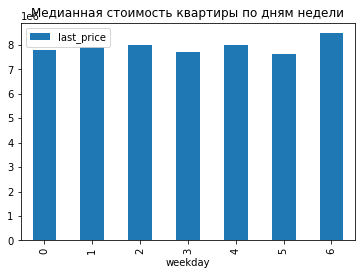

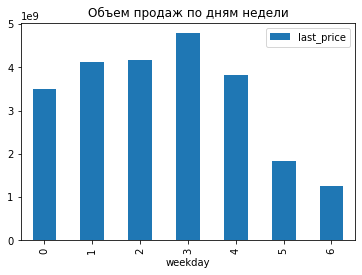

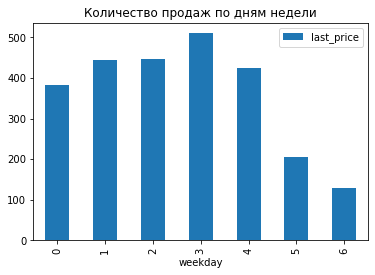

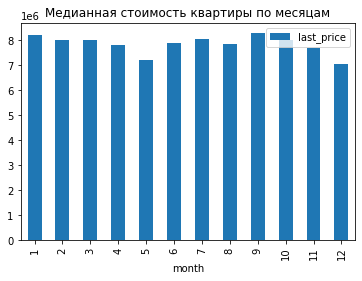

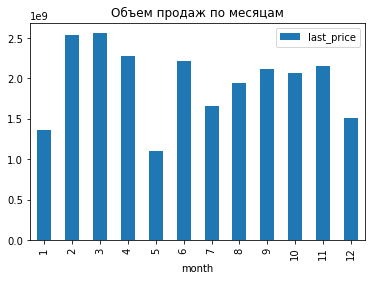

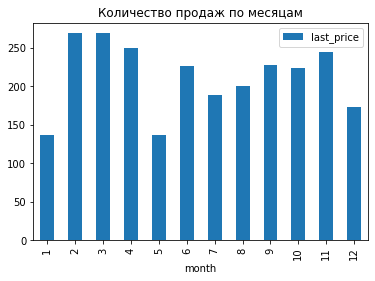

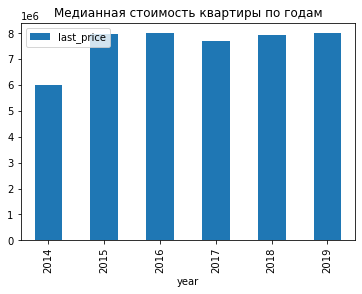

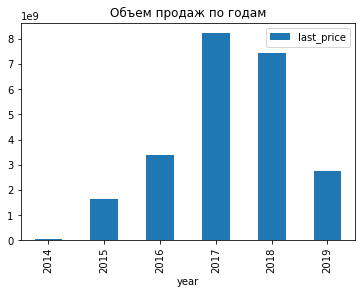

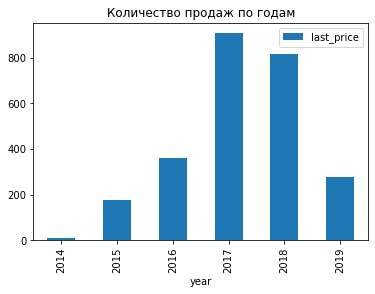

In [37]:
apartment_in_the_center = df.query("locality_name == 'Санкт-Петербург' & distance_for_center_in_km <= 7 ")
apartment_in_the_center = apartment_in_the_center[['last_price', 'rooms', 'total_area', 'ceiling_height','distance_for_center_in_km', 'weekday','month','year']]
display(apartment_in_the_center.corr())

print(apartment_in_the_center.pivot_table(index='weekday', values='last_price',aggfunc='median').plot(kind='bar', title='Медианная стоимость квартиры по дням недели'))
print(apartment_in_the_center.pivot_table(index='weekday', values='last_price',aggfunc='sum').plot(kind='bar', title='Объем продаж по дням недели'))
print(apartment_in_the_center.pivot_table(index='weekday', values='last_price',aggfunc='count').plot(kind='bar', title='Количество продаж по дням недели'))

print(apartment_in_the_center.pivot_table(index='month', values='last_price',aggfunc='median').plot(kind='bar', title='Медианная стоимость квартиры по месяцам'))
print(apartment_in_the_center.pivot_table(index='month', values='last_price',aggfunc='sum').plot(kind='bar', title='Объем продаж по месяцам'))
print(apartment_in_the_center.pivot_table(index='month', values='last_price',aggfunc='count').plot(kind='bar', title='Количество продаж по месяцам'))

print(apartment_in_the_center.pivot_table(index='year', values='last_price',aggfunc='median').plot(kind='bar', title='Медианная стоимость квартиры по годам'))
print(apartment_in_the_center.pivot_table(index='year', values='last_price',aggfunc='sum').plot(kind='bar', title='Объем продаж по годам'))
print(apartment_in_the_center.pivot_table(index='year', values='last_price',aggfunc='count').plot(kind='bar', title='Количество продаж по годам'))






Квартиры на периферии:

,last_price,rooms,total_area,ceiling_height,distance_for_center_in_km,weekday,month,year
last_price,1.000000,0.442382,0.752991,0.343993,-0.215109,0.006690,-0.004825,0.020561
rooms,0.442382,1.000000,0.781956,0.025945,-0.055204,0.004633,0.001807,-0.021614
total_area,0.752991,0.781956,1.000000,0.262548,-0.063295,0.004678,0.008937,-0.048190
ceiling_height,0.343993,0.025945,0.262548,1.000000,-0.150729,-0.012430,0.006179,-0.061708
distance_for_center_in_km,-0.215109,-0.055204,-0.063295,-0.150729,1.000000,-0.026548,0.014226,0.023819
weekday,0.006690,0.004633,0.004678,-0.012430,-0.026548,1.000000,-0.007487,-0.003083
month,-0.004825,0.001807,0.008937,0.006179,0.014226,-0.007487,1.000000,-0.287082
year,0.020561,-0.021614,-0.048190,-0.061708,0.023819,-0.003083,-0.287082,1.000000


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


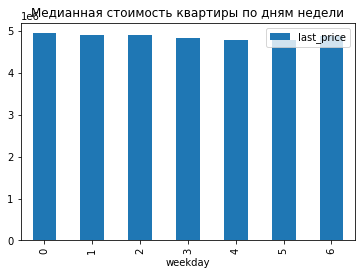

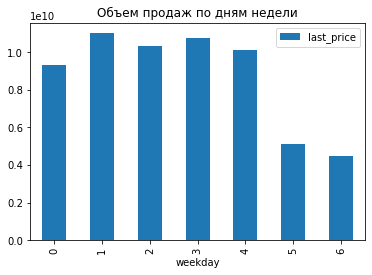

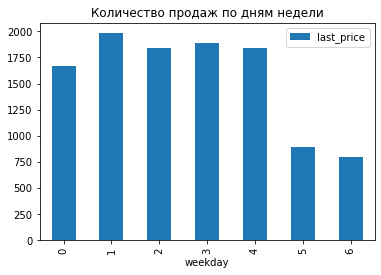

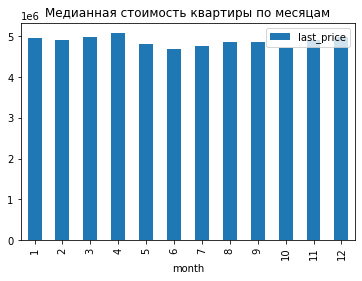

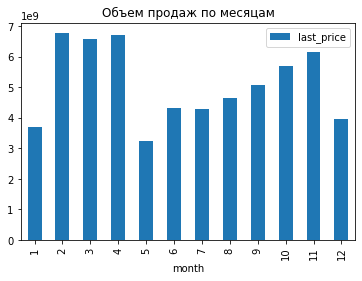

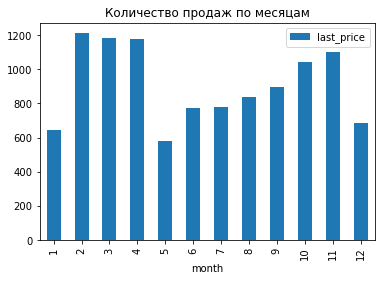

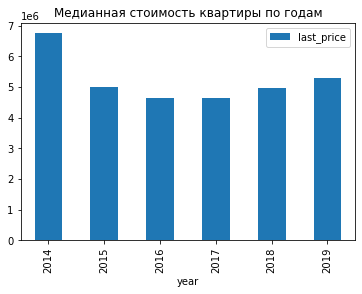

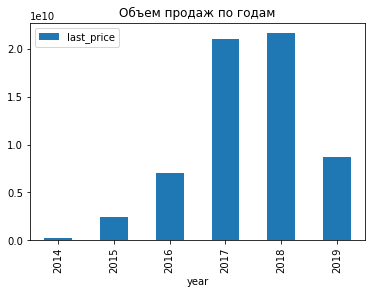

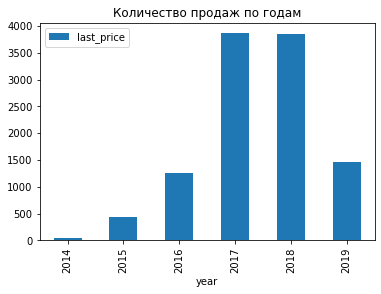

In [38]:
apartment_not_in_the_center = df.query("locality_name == 'Санкт-Петербург' & distance_for_center_in_km >= 7 ")
apartment_not_in_the_center = apartment_not_in_the_center[['last_price', 'rooms', 'total_area', 'ceiling_height','distance_for_center_in_km','first_day_exposition','weekday','month','year']]
display(apartment_not_in_the_center.corr())

print(apartment_not_in_the_center.pivot_table(index='weekday', values='last_price',aggfunc='median').plot(kind='bar', title='Медианная стоимость квартиры по дням недели'))
print(apartment_not_in_the_center.pivot_table(index='weekday', values='last_price',aggfunc='sum').plot(kind='bar', title='Объем продаж по дням недели'))
print(apartment_not_in_the_center.pivot_table(index='weekday', values='last_price',aggfunc='count').plot(kind='bar', title='Количество продаж по дням недели'))

print(apartment_not_in_the_center.pivot_table(index='month', values='last_price',aggfunc='median').plot(kind='bar', title='Медианная стоимость квартиры по месяцам'))
print(apartment_not_in_the_center.pivot_table(index='month', values='last_price',aggfunc='sum').plot(kind='bar', title='Объем продаж по месяцам'))
print(apartment_not_in_the_center.pivot_table(index='month', values='last_price',aggfunc='count').plot(kind='bar', title='Количество продаж по месяцам'))

print(apartment_not_in_the_center.pivot_table(index='year', values='last_price',aggfunc='median').plot(kind='bar', title='Медианная стоимость квартиры по годам'))
print(apartment_not_in_the_center.pivot_table(index='year', values='last_price',aggfunc='sum').plot(kind='bar', title='Объем продаж по годам'))
print(apartment_not_in_the_center.pivot_table(index='year', values='last_price',aggfunc='count').plot(kind='bar', title='Количество продаж по годам'))



В корреляциях характеристик квартир в центре и квартир на периферии каких-то аномалий не нашлось, всё подчиняется одним законам: Сильнее всего на цену влияет её квадратура, затем количество комнат и высота потолков, расстояние до центра же в обоих случаях покасало слабую отрицательную корреляцию. 

Что в центре,  что на периферии больше объявлений публикуют на буднях.

С февраля по март и с августа по ноябрь продают больше квартир. 

А вот корреляция цены квартиры и года продажи у квартир в центре и квартир на периферии обратно пропорциональны. 
Квартиры в центре в 2014 году стоили дешевле, а квартиры на периферии же напротив в 2014 стоили дороже. 
В 2015 произошел резкий рост средней стоимости квартиры в центре, а квартиры на периферии же напротив резко упали в цене.
По количеству продаж втечении всего времени наблюдается одинаковая картина как для центра так и для окраин, 2014 - продается меньше всего  квартир, с 2014 плавно начало расти количество продаваемых квартир пока не вышло на свой максимум в 2017 и 2018-ых годах, затем в 2019 произошел резкий спад. 

## Общий вывод

Больше всего на цену влияют квадратура и количество комнат и факт нахождения в центре. А вот расстояние до центра не коррелирует с ценой как в квартирах расположенных в центре, так и в квартирах на окраине.

Квартиры на первом и последнем этажах обычно дешевле прочих.

В корреляциях характеристик квартир в центре и квартир на периферии каких-то аномалий не нашлось, всё подчиняется одним законам: Сильнее всего на цену влияет её квадратура, затем количество комнат и высота потолков, расстояние до центра же в обоих случаях покасало слабую отрицательную корреляцию. 

Что в центре,  что на периферии больше объявлений публикуют на буднях.

С февраля по апрель и с августа по ноябрь продают больше квартир. 

А вот корреляция цены квартиры и года продажи у квартир в центре и квартир на периферии обратно пропорциональны. 
Квартиры в центре в 2014 году стоили дешевле, а квартиры на периферии же напротив в 2014 стоили дороже. 
В 2015 произошел резкий рост средней стоимости квартиры в центре, а квартиры на периферии же напротив резко упали в цене.
По количеству продаж втечении всего времени наблюдается одинаковая картина как для центра так и для окраин, 2014 - продается меньше всего  квартир, с 2014 плавно начало расти количество продаваемых квартир пока не вышло на свой максимум в 2017 и 2018-ых годах, затем в 2019 произошел резкий спад. 